In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#from tensorflow.examples. tutorials.mnist import input_data
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [4]:
def draw_learning_curve(train_acc, val_acc, test_acc):
    t = range(len(train_acc))
    plt.plot(t, train_acc, label='train')
    plt.plot(t, val_acc, label='val')
    plt.plot(t, test_acc, label='test')
    plt.legend()
    plt.show()

In [5]:
def draw_loss(train_loss):
    t = range(len(train_loss))
    plt.plot(t, train_loss, label='Cross entropy')
    plt.legend()
    plt.show()

In [6]:
def draw_distributions(layers):
    for i, layer in enumerate(layers):
        name = layer.name
        if not layer.get_weights() :
            continue
        weight, bias = layer.get_weights()
        plt.figure()
        plt.subplot(121)
        plt.hist(weight.flatten(), 100)
        plt.xlabel(name + '_weight')
        plt.ylabel('number')
        plt.subplot(122)
        plt.hist(bias.flatten(), 100)
        plt.xlabel(name + '_bias')
        plt.ylabel('number')
    plt.show() 

In [7]:
def false_predict(x_test, Y_test, predict):
    count = 0
    for index, my_pred in enumerate(predict):
        pred_label = np.argmax(my_pred)
        if pred_label != Y_test[index]:
            plt.imshow(x_test[index], cmap='gray')
            img = x_test[index][np.newaxis]
            print('label: %d, pred: %d' % (Y_test[index], np.argmax(predict[index])))
            break
    return img

In [8]:
def feature_map(model, img):
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input,outputs=layer_outputs)
    activations = activation_model.predict(img)
    for index, layer in enumerate(model.layers):
        if layer.name[:3] == 'con':
            plt.figure()
            count = 1
            for i in range(3):
                plt.subplot(100*count + 30 + i+1)
                feature = activations[index][0,:,:,i]
                plt.imshow(feature, cmap='gray')
            count += 1

In [9]:
def without_l2(input_size):
    model = Sequential()  
    model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  input_shape=input_size,  activation='relu'))   
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  activation='relu'))   
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Flatten()) 
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.summary()
    return model

In [10]:
def with_l2(input_size):
    l2_rate = 0.01
    model = Sequential()  
    model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  input_shape=input_size,  activation='relu', kernel_regularizer=regularizers.l2(l=l2_rate)))   
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  activation='relu', kernel_regularizer=regularizers.l2(l=l2_rate)))   
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Flatten()) 
    model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(l=l2_rate)))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.summary()
    return model

In [11]:
def my_train(model, epochs):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    test_loss =[]
    test_acc = []
    for i in range(1,epochs+1):
        print("Epoch %d/%d" %(i, epochs))
        history = model.fit(x_train, y_train, epochs=1, batch_size=64, shuffle=True, validation_data=(x_val, y_val))
        loss, acc = model.evaluate(x_test, y_test, verbose=0)
        train_loss.append(history.history['loss'])
        train_acc.append(history.history['accuracy'])
        val_loss.append(history.history['val_loss'])
        val_acc.append(history.history['val_accuracy'])
        test_loss.append(loss)
        test_acc.append(acc)
    return (train_loss, train_acc, val_loss, val_acc, test_loss, test_acc)

In [12]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(-1, 28, 28, 1)/255
x_test = X_test.reshape(-1, 28, 28, 1)/255
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
Y_train = Y_train[indices]
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [13]:
x_val = x_train[:5000]
x_train = x_train[5000:]
y_val = y_train[:5000]
y_train = y_train[5000:]

In [16]:
input_size = (28,28,1)
model = without_l2(input_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 25,258
Trainable params: 25,258
Non-trainable params: 0
__________________________________________________

In [20]:
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = my_train(model, 5)

Epoch 1/5
Train on 55000 samples, validate on 5000 samples
   64/55000 [..............................] - ETA: 29s

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_1/conv2d_2/Conv2D (defined at <ipython-input-11-5ddc388b8749>:10) ]] [Op:__inference_distributed_function_962]

Function call stack:
distributed_function


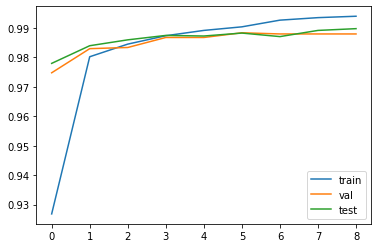

In [39]:
draw_learning_curve(train_acc, val_acc, test_acc)
draw_loss(train_loss)
draw_distributions(model.layers)
img = false_predict(x_test, Y_test, model.predict(x_test))
feature_map(model, img)

In [50]:
input_size = (28,28,1)
model = with_l2(input_size)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                15690     
Total params: 25,258
Trainable params: 25,258
Non-trainable params: 0
__________________________________________________

In [51]:
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = my_train(model, 5)

Epoch 1/5
860/860 [==============================] - 17s 20ms/step - loss: 0.5387 - accuracy: 0.9145 - val_loss: 0.3749 - val_accuracy: 0.9530
Epoch 2/5
860/860 [==============================] - 17s 19ms/step - loss: 0.3566 - accuracy: 0.9562 - val_loss: 0.3428 - val_accuracy: 0.9624
Epoch 3/5
860/860 [==============================] - 16s 19ms/step - loss: 0.3439 - accuracy: 0.9595 - val_loss: 0.3448 - val_accuracy: 0.9612
Epoch 4/5
860/860 [==============================] - 16s 19ms/step - loss: 0.3383 - accuracy: 0.9615 - val_loss: 0.3475 - val_accuracy: 0.9566


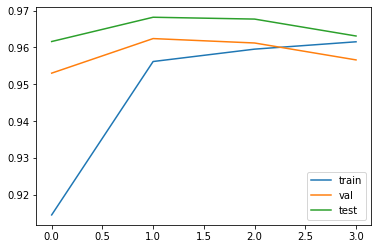

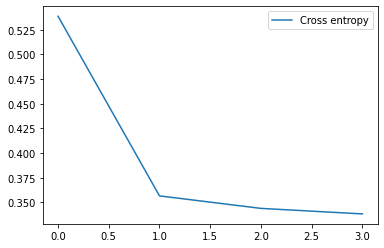

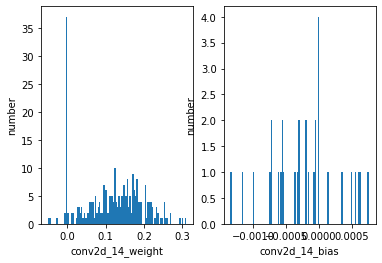

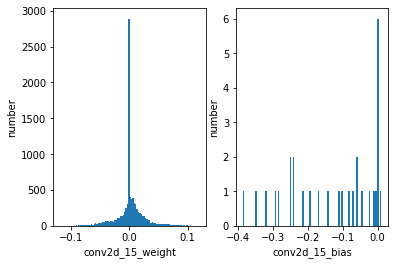

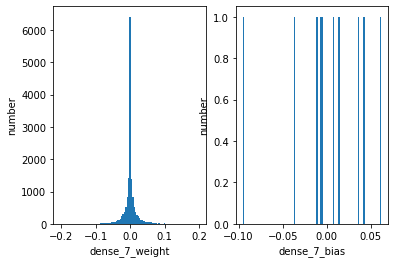

label: 4, pred: 9


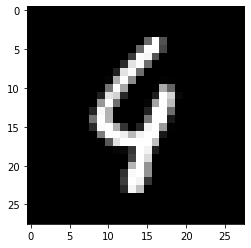

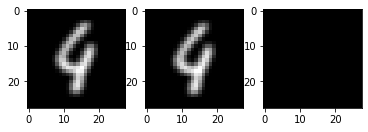

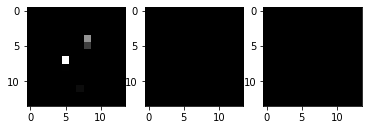

In [52]:
draw_learning_curve(train_acc, val_acc, test_acc)
draw_loss(train_loss)
draw_distributions(model.layers)
img = false_predict(x_test, Y_test, model.predict(x_test))
feature_map(model, img)